# Limpieza de datos y preparacion df
Basado en Hair et AI. (2013), capítulo 'Examining your data', vamos a proceder con los siguientes pasos

* **1. Entender el problema:** Mirar cada variable y su relevancia para resolver el problema
* **2. Análisis univariante:** realizado sobre la variable target (SalesPrice)
* **3. Análisis multiunivariante:** para obtener variables dependientes e independientes
* **4. Limpieza de datos:** detectar NAs, outliers y variables categóricas
* **5. Transformación de datos:** aplicando análisis multivariante, vamos a tener que 
    - Normalizar datos: hacer que sigan una distribución normal (dado que luego cuando usemos algunos análisis estadísticos, si no lo siguen nos saldrán mal). Lo haremos solo respecto a la variable target y si tenemos pocos datos, dado que este punto para grandes volumenes de datos no suele ser un problema
    - Heterocedasticidad: para asegurar que un error no es constante para todas las variables independientes
    - Linealidad
    - Asegurar que no hay errores correlacionados

* **6. Conclusiones** 

---

En este apartado, el del limpieza y preparación de los datos, abordaremos los puntos 4 a 6

---

##  ( Obtención de datos) 

Realizamos Importación de librerías y ficheros 

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Importación de ficheros
df_train = pd.read_csv('data/PreciosCasas/train.csv')
df_train.describe();
df_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [2]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Como se puede observar, hemos importado 1460 registros distintos, y disponemos de varias variables para determinar el precio de las casas
Tenemos de variables numéricas y categóricas, además, para empezar el análisis vamos a:
* seleccionar aquellas que por lógica, nos parece que guardarán más relación con la variable target (SalesPrice). Por ejemplo, si el tener o no garaje puede encarecer un piso (que parece indicar que si), o
* y que variables a priori, parecen relacionadas entre sí. Por ejemplo, hasta que punto necesito LandScope, que me indica ya la inclinación de la propiedad, si tengo ya LandContour

A priori, suponemos que las siguientes variables son importantes: OverallQual, YearBuilt, TotalBsmtSF, GrLivArea, Neigborhood

y analicemos entonces la **variable target**. Se ve el los resultados anteriores ( o por ``df_train['SalePrice'].describe()`` ) que sí tenemos datos para las 1460 variables, que el mínimo es mayor que cero (y por lo tanto, sí hay información) y que además se distribuye siguiendo una distribución normal con asimetría positiva (possitive skewness), es decir, son sesgo en valores superiores a la media (tenemos propiedades cuyo precio es muy superior al de la mayoría), y con los valores concentrados en la región central de la distribución (curtosis > D. normal). 
**Podemos por tanto continuar el análisis para predicción de esa variable **

Skewness: 1.882876
Kurtosis: 6.536282


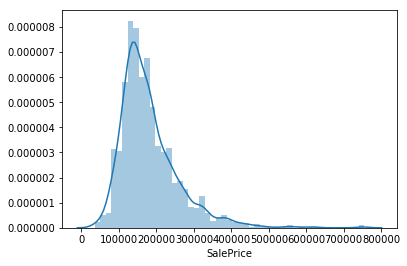

In [3]:
#histograma
sns.distplot(df_train['SalePrice']);

# Valor de la asimetría y curtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

##  4. Limpieza de datos

- **Missing data**

    Este tema es muy relevante, pues ¿hasta que punto los NAs siguen un patrón aleatorio o son constantes en nuestros datos? Puede llevarnos a reducir tanto el tamaño de la muestra que hasta nos impida hacer el análisis. Pasemos pues a analizarlo y ver hasta que punto las variables que hemos visto más significativas, están completas o no


In [4]:
#missing data ordenados por %
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


*Hipótesis: un dato no es correcto si tiene más de un 15 % de NAs*

Según esto
- 'PoolQC', 'MiscFeature', 'Alley', etc no podremos considerarlas (pero no importa, no parecían relevantes tampoco, e incluso ser outliers)
- 'Garage..' lo mismo, pero como 'GarageCars' no está en la lista, sí (tendrá como máximo un 5% de los valores NAs, pero no más)
- 'MasVnrArea' y 'MasVnrType' tampoco parecían relevantes, así que bien (y mirando el mapa de calor, estabas correlacionadas con 'YearBuilt' y 'OverallQual' así que no perdemos nada)
- 'Electrical' tiene solo una observación, así que la borraremos pero sí mantendremos la variable


In [6]:
#Creación de los nuevo data frames
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

# Veamos que está bien (debe dar 0
print ("El valor seberia salir 0 y sale: ");
df_train.isnull().sum().max() 

El valor seberia salir 0 y sale: 


0

- **Imputación**

    La opción para quitar los NAs cuando no queremos simplemente quitar las columnas que los contengan, es la imputación: rellenar esos "huecos" el valor medio. Una extensión a esto sería ademas indicar en que casos se ha hecho eso (en otra columna) para que le modelo lo tenga en cuenta, pero normalmente no aporta tanto como el tiempo que tarda. 
    Vamos a hacer una imputación simple, para los NAs de los valores numéricos (obvio)


In [19]:
Col_numeros = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']
df_train_numeros = df_train[Col_numeros]

In [20]:
from sklearn.preprocessing import Imputer

# Imputation
my_imputer = Imputer()
df_train_numeros_imp = my_imputer.fit_transform(df_train_numeros)

Pero **¿Cómo sabemos que esto es mejor?** hagamos una prueba simple, una regresión de los dos df a ver que error se produce

In [21]:
#Cojamos por ejemplo un randomforest (función)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [23]:
#Hagamos el grupo train y test
from sklearn.model_selection import train_test_split

X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(df_train_numeros, 
                                                    df_train_numeros['SalePrice'],
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)


In [25]:
df_train_numeros

##1) Quitando todos los nulos
cols_with_missing = [col for col in X_train_N.columns 
                                 if X_train_N[col].isnull().any()]
reduced_X_train = X_train_N.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test_N.drop(cols_with_missing, axis=1)

print("Mean Absolute Error para los datos numericos:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train_N, y_test_N));

##2) imputacióon
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train_N)
imputed_X_test = my_imputer.transform(X_test_N)

print("Mean Absolute Error para los datos con imputación:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train_N, y_test_N))

Mean Absolute Error para los datos numericos:
368.121232877
Mean Absolute Error para los datos con imputación:
564.597031963


# No deberia salir esto

In [50]:
imputed_X_train.shape

(1021, 8)

- **Outliars**

    Hay que definir un umbral a partir del cual definimos un dato como outliar, para lo cual necesitaremos estandarizar los datos, y analizar cuanto se desvian de 0 por encima y por debajo


In [27]:
#Estandarizar datos del target
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('Rango bajo (low) de la distribución:')
print(low_range)
print('\nRango alto (high) de la distribución')
print(high_range)

Rango bajo (low) de la distribución:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Rango alto (high) de la distribución
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


los valores por debajo no preocupan (en torno a -1), pero los por encima si, especiamente esos de más de 7 (seguramente son outliars). Veamos estos datos en perspectiva con las dos variables más significativas o relacionadas con la target

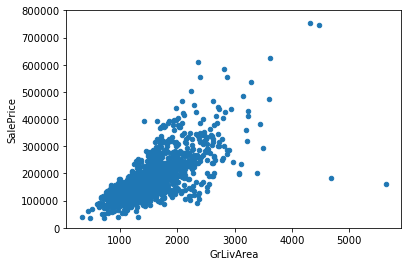

In [28]:
# saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

en efecto, tenemos dos valores que para ese tamaño de propiedad, no pega que sean tan bajos y se desvian de la tendencia, así que los quitaremos. Mantendremos sin embargo los dos valores de precio más alto, dado que SI parecen mantener esa tendencia

In [29]:
#Eliminar outliers
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

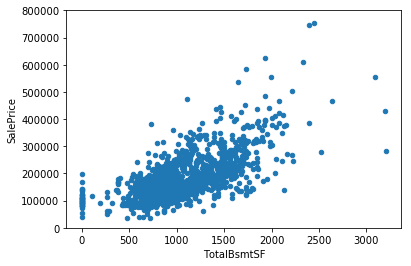

In [30]:
# saleprice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Para este caso, no merece la pena quitar nada

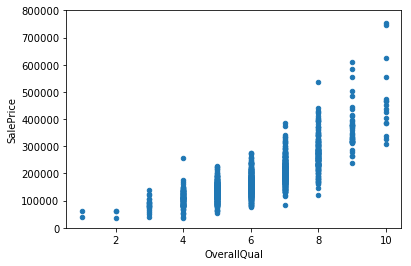

In [31]:
# saleprice/OverallQual
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## 5. Transformación de datos

Veamos como han quedado los datos y que distribución siguen para saber si debemos ajustarlos de alguna manera

### Normalización

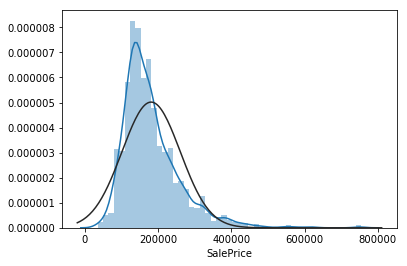

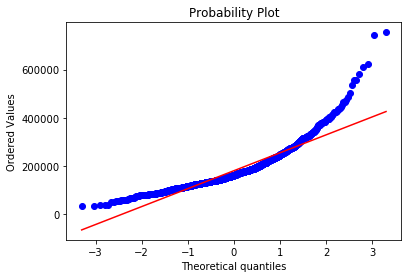

In [32]:
#histograma y normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Para casos de asimetría positiva, se puede lograr que los datos sigan una distribución normal mediante una transformación logartimica, esto es:

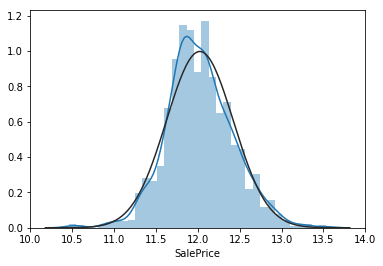

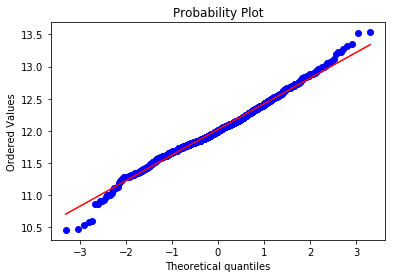

In [33]:
# transformación logarítmica
df_train_log = pd.DataFrame(df_train)
df_train_log ['SalePrice'] = np.log(df_train['SalePrice'])

# nuevo histograma y normal probability plot
sns.distplot(df_train_log['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_log['SalePrice'], plot=plt)

Y claro, pasará lo mismo con 

    1) 'GrLivArea'
    2) 'TotalBsmtSF'

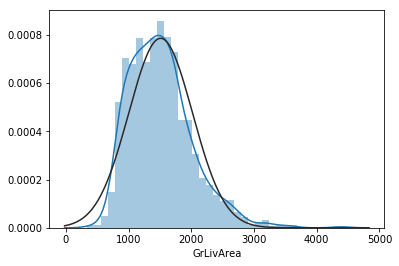

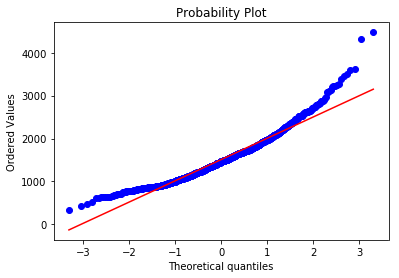

In [34]:
# 1) GrLivArea
#histograma y normal probability plot
sns.distplot(df_train_log['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_log['GrLivArea'], plot=plt)

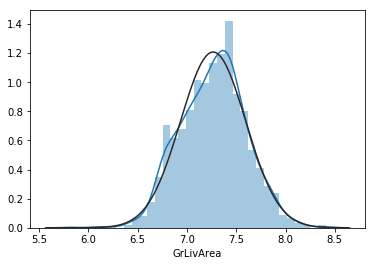

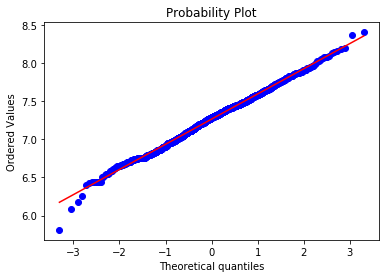

In [35]:
# transformación logaritmica
df_train_log ['GrLivArea'] = np.log(df_train_log['GrLivArea'])

#transformed histogram and normal probability plot
sns.distplot(df_train_log['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_log['GrLivArea'], plot=plt)

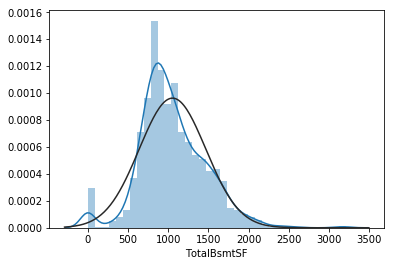

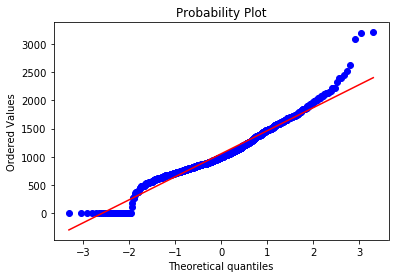

In [36]:
# 2) TotalBsmtSF
#histogram and normal probability plot
sns.distplot(df_train_log['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_log['TotalBsmtSF'], plot=plt)

En este caso hay valores = 0, por lo tanto NO se puede aplicar logaritmos. De nuevo, hay que hacer una suposición, cuando esos ceros seguramente se refieren a que no hay sotano, así que en este caso, la teoría dice que hay que hacer una nueva variable binaria (siene sotano si/no) y luego a los que sí, aplicar ya la transformación de los datos 


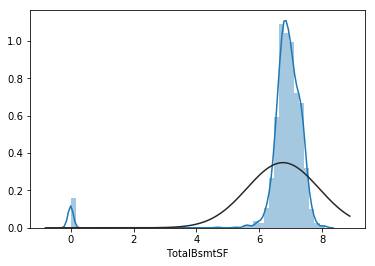

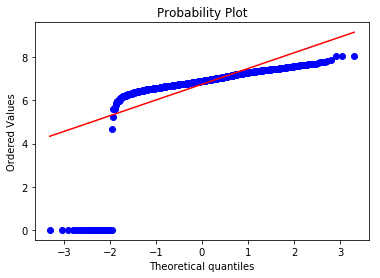

In [37]:
df_train_log['ConBasement'] = 1
df_train_log['ConBasement'][df_train_log['TotalBsmtSF'] ==0] = int (0)

# Y ahora quitamos los 0 de TotalBsmtSF y hacemos el logaritmo
df_train_log2 = pd.DataFrame(df_train_log)

# transformación logaritmica
df_train_log2 ['TotalBsmtSF'][df_train_log2 ['TotalBsmtSF']!= 0] = np.log1p(df_train_log2['TotalBsmtSF'])

#transformed histogram and normal probability plot
sns.distplot(df_train_log2['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_log2['TotalBsmtSF'], plot=plt)



### Heterocedasticidad
Lo haremos de forma gráfica: si tiene forma cónica o de diamante

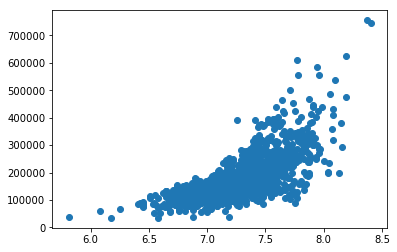

In [38]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

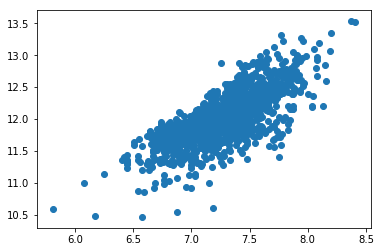

In [39]:
plt.scatter(df_train_log['GrLivArea'], df_train_log['SalePrice']);

Antes los datos tenian forma de diamante, pero tras la normalización ya no, por lo que no tenemos problemas en este punto para 'GrLivArea'

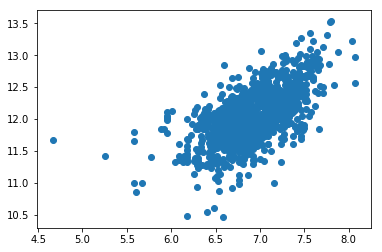

In [40]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

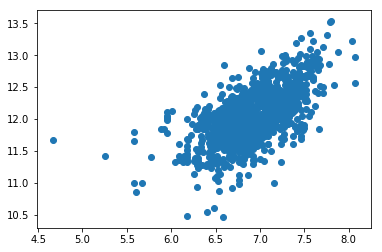

In [41]:
#scatter plot
plt.scatter(df_train_log[df_train_log['TotalBsmtSF']>0]['TotalBsmtSF'], df_train_log[df_train_log['TotalBsmtSF']>0]['SalePrice']);

en este caso igual, parece que la varianza del target respecto a TotalBsmtSF es similar en todo el rango

### Variables Dummy
Hay una función que lo hace

In [42]:
#convert categorical variable into dummy
df_train_log = pd.get_dummies(df_train_log)

## Conclusiones
Disponemos de un data frame limpio y listo para ser usado en los siguientes apartados de modelización. Subámoslo pues a nuestro repositorio para poder usarlo


In [43]:
df_train_log.to_csv('data/PreciosCasas/train_final.csv', sep='\t', encoding='utf-8')

In [44]:
df_train_log.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,...,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,729.805765,56.877145,10460.434454,6.094715,5.576527,1971.194235,1984.818806,439.128346,46.645161,567.222375,...,0.003432,0.082361,0.002059,0.868909,0.069321,0.002745,0.008236,0.013727,0.821551,0.084420
std,421.402158,42.339638,9862.564977,1.376542,1.113638,30.190353,20.640669,432.964939,161.471529,442.212926,...,0.058500,0.275008,0.045345,0.337616,0.254086,0.052342,0.090410,0.116395,0.383022,0.278112
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,20.000000,7540.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.000000,50.000000,9473.000000,6.000000,5.000000,1972.000000,1994.000000,383.000000,0.000000,479.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1094.000000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,712.000000,0.000000,808.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2188.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
